In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from datetime import datetime
from collections import Counter
from collections import defaultdict
from matplotlib.dates import date2num, num2date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [3]:
df1 = pd.read_csv('/Users/ignatiustobiassoetjianto/Desktop/Project/BEE2041_Project/Data_files/df1_wc.csv')
df1

,Release Date,Character,Rarity,Constellation Description,Word Count
0,2020-12-23,Albedo,5star,Transient Blossoms generated by Albedo's Abiog...,141
1,2023-01-18,Alhaitham,5star,"When a Projection Attack hits an opponent, Uni...",252
2,2021-10-13,Aloy,5star,This character has no constellations.,5
3,2021-07-01,Ayaka,5star,When Kamisato Ayaka's Normal or Charged Attack...,138
4,2022-03-30,Ayato,5star,Shunsuiken DMG is increased by 40% against opp...,121
...,...,...,...,...,...
80,2020-09-28,traveler(anemo),5star,Palm Vortex pulls in enemies within a 5m radiu...,80
81,2020-09-28,traveler(dendro),5star,"After Razorgrass Blade hits an opponent, it wi...",126
82,2020-09-28,qiqi,5star,When the Herald of Frost hits an enemy marked ...,102
83,2020-09-28,mona,5star,The effects of Hydro-related Elemental Reactio...,165


In [5]:
type(df1['Release Date'][0])

str

In [6]:
df1['Release Date'] = pd.to_datetime(df1['Release Date'])

In [7]:
type(df1['Release Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

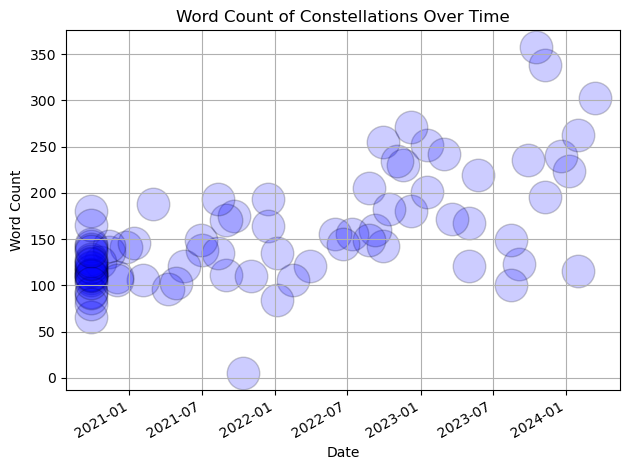

In [8]:
#Creating plots with the new data frame.

df1.plot.scatter(x='Release Date', y = 'Word Count', color = 'blue',
                 marker = 'o', edgecolor = 'black', alpha = 0.20, s=550)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
#Splitting original dataframe into a list, and then converting the list into a pd.DataFrame

Rarity = df1.groupby('Rarity')
df1_Rarity = [group_df for _, group_df in Rarity]
df1_Epic, df1_Legendary = df1_Rarity

#Splitting original dataframe into a list, and then converting the list into a pd.DataFrame

Rarity = df1.groupby('Rarity')
df1_Rarity = [group_df for _, group_df in Rarity]
df1_Epic, df1_Legendary = df1_Rarity

df1_Epic.reset_index(inplace = True, drop = True)
df1_Legendary.reset_index(inplace = True, drop = True)

#display(df_Epic_2)
#display(df_Legendary_2)

In [13]:
#Create Function that count specific words/strings

def count_target_words(Input, Target):
    words = Input.split()
    count = 0
    
    
    for target in Target:
        for word in words:
#        word = word.strip('.,?!:;-()[]{}\'"')
    
            if word == target:
                count += 1
    
    return count

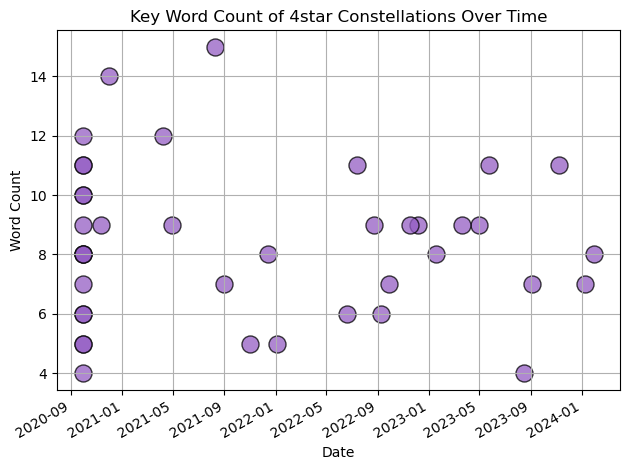

In [19]:
#Creating new dataframe with different counts (df2), on the 4 star characters

df2_Epic = df1_Epic#.drop(columns = ['Word Count'])
df2_Epic['Constellation Desc'] = df2_Epic['Constellation Description'].replace(".", "").replace('(', "").replace(')', "")

#df['Text'] = df['Text'].apply(lambda x: x.lower())
df2_Epic['Constellation Desc'] = df2_Epic['Constellation Desc'].apply(lambda x: x.lower())
df2_Epic = df2_Epic.drop(columns = ['Constellation Description'])

#Aggregate of all "Meaningful" key word stats.
df2_Epic['Key Count'] = df2_Epic['Constellation Desc'].apply(lambda x: count_target_words(x, ['crit',
                                                                                              'energy',
                                                                                              'increase',
                                                                                              'increases',
                                                                                              'decrease',
                                                                                              'decreases',
                                                                                              'recharge',
                                                                                              'atk',
                                                                                              'dmg',
                                                                                              'elemental',
                                                                                              'element',
                                                                                              'refund',
                                                                                              'attacks',
                                                                                              'reaction',
                                                                                              'reactions',
                                                                                              'attack']))


#Creating plots for 4 Star Rarities key words

df2_Epic.plot.scatter(x = 'Release Date', y = 'Key Count', color='#945dc4',
                 marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

#Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Key Word Count of 4star Constellations Over Time')

#Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

#Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

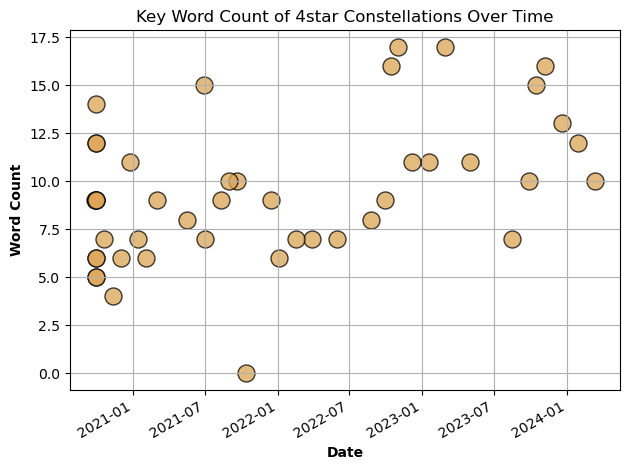

In [20]:
#Creating new dataframe with different counts (df2), on the 5 star characters

df2_Legendary = df1_Legendary#.drop(columns = ['Word Count'])
df2_Legendary['Constellation Desc'] = df2_Legendary['Constellation Description'].replace(".", "").replace('(', "").replace(')', "")

#df['Text'] = df['Text'].apply(lambda x: x.lower())
df2_Legendary['Constellation Desc'] = df2_Legendary['Constellation Desc'].apply(lambda x: x.lower())
df2_Legendary = df2_Legendary.drop(columns = ['Constellation Description'])

#Aggregate of all "Meaningful" key word stats.
df2_Legendary['Key Count'] = df2_Legendary['Constellation Desc'].apply(lambda x: count_target_words(x, ['crit',
                                                                                              'energy',
                                                                                              'increase',
                                                                                              'increases',
                                                                                              'decrease',
                                                                                              'decreases',
                                                                                              'recharge',
                                                                                              'atk',
                                                                                              'dmg',
                                                                                              'elemental',
                                                                                              'element',
                                                                                              'refund',
                                                                                              'attacks',
                                                                                              'reaction',
                                                                                              'reactions',
                                                                                              'attack']))



#Creating plots for 5 Star Rarities key words

df2_Legendary.plot.scatter(x = 'Release Date', y = 'Key Count', color='#dca454',
                           marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

# Adding labels and title
plt.xlabel('Date', fontweight = 'bold')
plt.ylabel('Word Count', fontweight = 'bold')
plt.title('Key Word Count of 4star Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

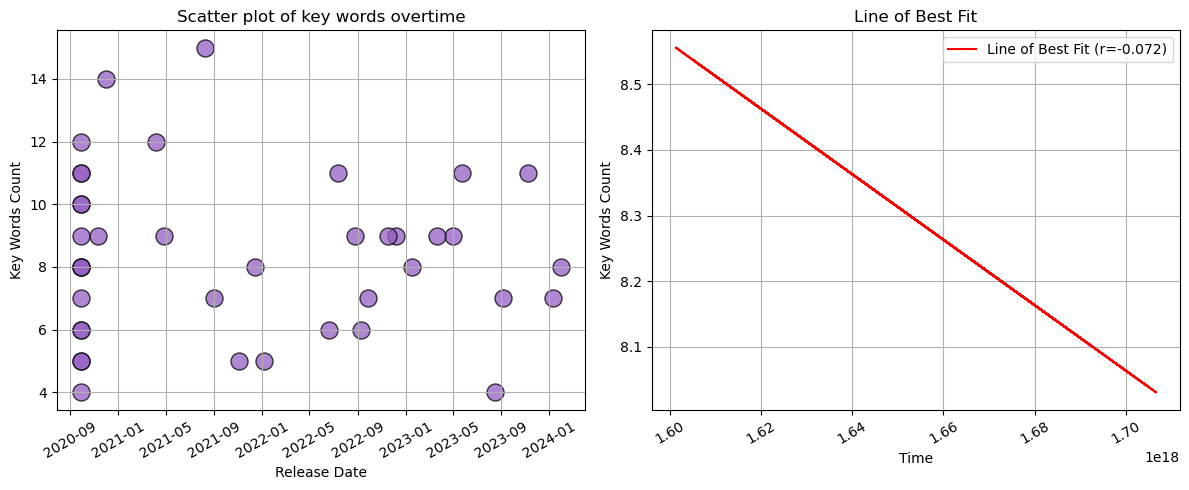

In [21]:
#Creating subplots for 4 Star Rarities key words

#Data
X1_test = df2_Epic['Release Date']
X1_test_int = X1_test.astype(int)

Y1_test = df2_Epic['Key Count']

df2_Epic_set = np.polyfit(X1_test_int, Y1_test, 1)
df2_Epic_line = np.poly1d(df2_Epic_set)

r_value = np.corrcoef(X1_test_int, Y1_test)[0, 1]



#Setting the Subplot
df2_TEST_1, ax = plt.subplots(1, 2, figsize=(12, 5))


#Scatter Plot
ax[0].scatter(X1_test, Y1_test, color='#945dc4',
              marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)


ax[0].set_xlabel('Release Date')
ax[0].set_ylabel('Key Words Count')
ax[0].set_title('Scatter plot of key words overtime')



#Creating Line of Best Fit

#ax[1].plot(X1_test_int, poly(X1_test_int), color='red', label='Line of Best Fit')

ax[1].plot(X1_test_int, df2_Epic_line(X1_test_int), color = 'red', label = f'Line of Best Fit (r={r_value:.3f})')

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Key Words Count')
ax[1].set_title('Line of Best Fit')



#df2_Epic_set = np.polyfit(X1_test_int, Y1_test, 1)
#df2_Epic_line = np.poly1d(df2_Epic_set)




#plt.plot(X1_test_int, df2_Epic_line(X1_test_int), color='red', label='Line of Best Fit')

#Convert from data back into datetime?
#pd.to_datetime(X1_test)



#Formatting x-axis ticks as dates

for axis in ax:
    axis.tick_params(axis = 'x', rotation=30)
    axis.grid(True)
#    axis.tight_layout()
    
    
#Display the plot
#plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

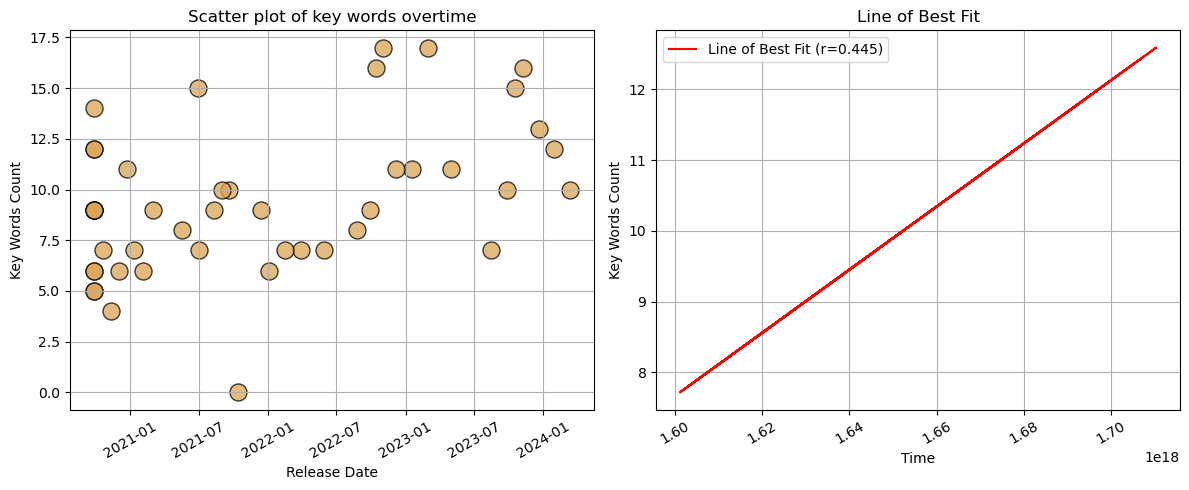

In [22]:
#Creating subplots for 5 Star Rarities key words

#Data
X1_test = df2_Legendary['Release Date']
X1_test_int = X1_test.astype(int)

Y1_test = df2_Legendary['Key Count']

df2_Legendary_set = np.polyfit(X1_test_int, Y1_test, 1)
df2_Legendary_line = np.poly1d(df2_Legendary_set)

r_value = np.corrcoef(X1_test_int, Y1_test)[0, 1]


#Setting Subplots
df2_TEST_2, ax = plt.subplots(1, 2, figsize=(12, 5))


#Scatter Plot
ax[0].scatter(X1_test, Y1_test, color='#dca454',
              marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

ax[0].set_xlabel('Release Date')
ax[0].set_ylabel('Key Words Count')
ax[0].set_title('Scatter plot of key words overtime')



#Creating Line of Best Fit
ax[1].plot(X1_test_int, df2_Legendary_line(X1_test_int), color = 'red', label = f'Line of Best Fit (r={r_value:.3f})')

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Key Words Count')
ax[1].set_title('Line of Best Fit')



#Formatting x-axis

for axis in ax:
    axis.tick_params(axis = 'x', rotation=30)
    axis.grid(True)
    
    
#Display the plot
plt.tight_layout()
plt.legend()
plt.show()

In [57]:
#Creating a function to make the subplot system


def get_keyword_count_graph(dataframe):
    
#Data
    X1_test = dataframe['Release Date']
    X1_test_int = X1_test.astype(int)

    Y1_test = dataframe['Key Count']

    dataframe_set = np.polyfit(X1_test_int, Y1_test, 1)
    dataframe_line = np.poly1d(dataframe_set)

    r_value = np.corrcoef(X1_test_int, Y1_test)[0, 1]


#Setting Subplots
    dataframe_TEST, ax = plt.subplots(1, 2, figsize=(12, 5))


#Scatter Plot

    if dataframe['Rarity'][0] == '4star':
        ax[0].scatter(X1_test, Y1_test, color='#945dc4',
                      marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

        ax[0].set_xlabel('Release Date')
        ax[0].set_ylabel('Key Words Count')
        ax[0].set_title('Scatter Plot of 4 star Character key words overtime')

    else:
        ax[0].scatter(X1_test, Y1_test, color='#dca454',
                      marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

        ax[0].set_xlabel('Release Date')
        ax[0].set_ylabel('Key Words Count')
        ax[0].set_title('Scatter Plot of 5 star Character key words overtime')

        
#Creating Line of Best Fit
    ax[1].plot(X1_test_int, dataframe_line(X1_test_int), color = 'red', 
               label = f'Line of Best Fit (r={r_value:.3f})')

    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Key Words Count')
    ax[1].set_title('Line of Best Fit')



#Formatting x-axis

    for axis in ax:
        axis.tick_params(axis = 'x', rotation=30)
        axis.grid(True)
    
    
#Display the plot
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    #return dataframe_TEST
    

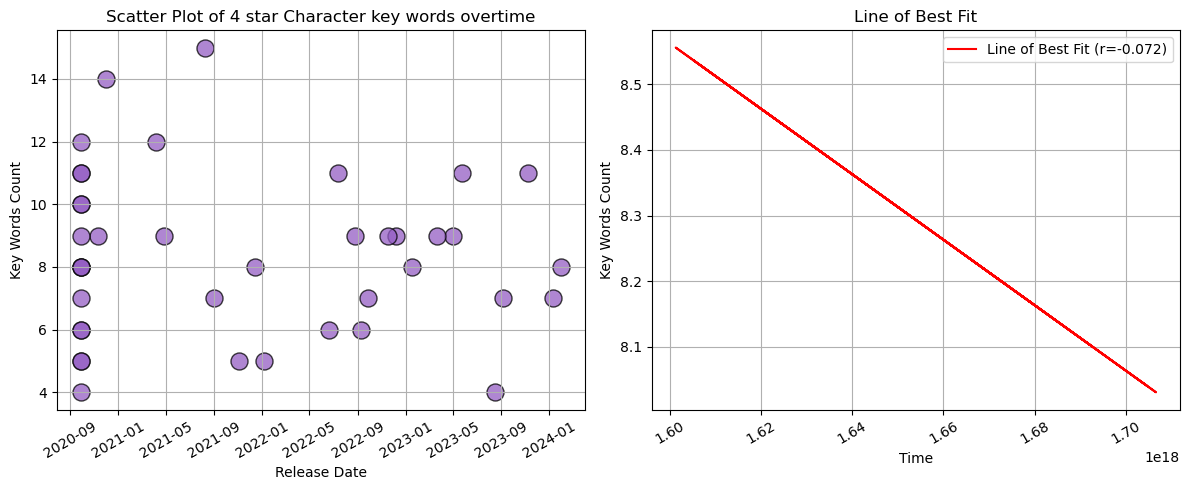

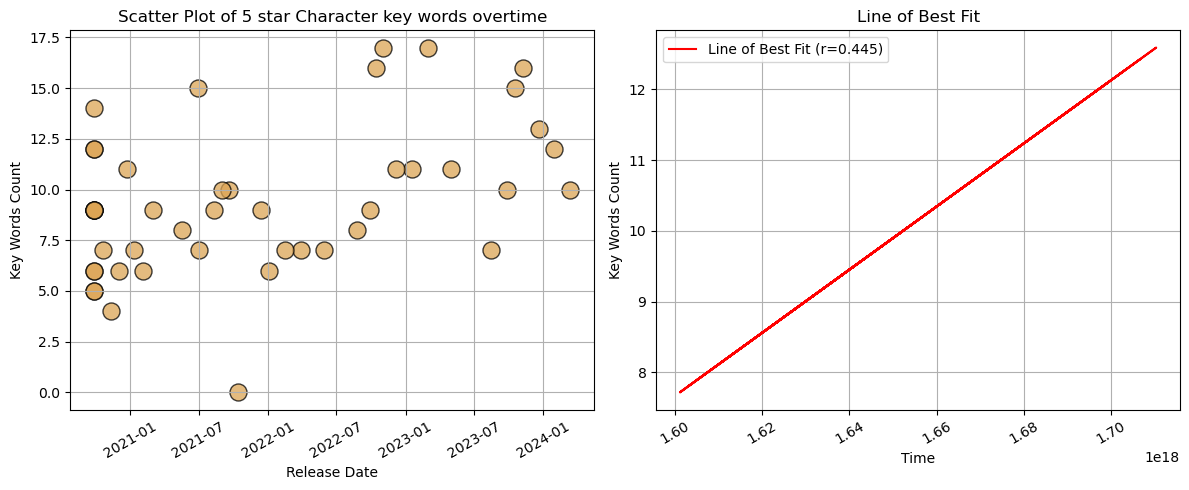

In [59]:
get_keyword_count_graph(df2_Epic)
get_keyword_count_graph(df2_Legendary)

In [34]:
if df2_Epic['Rarity'][0] == '4star':
    print('Its Epic')

Its Epic


In [55]:
#Creating a function to make a histogram


def get_histogram_simple(dataframe):
    

#Aggregating all 4 stars into one paragraph.
    dataframe_cons_all = ' '.join(dataframe['Constellation Description'])

#Cleaning the paragraph
    testing1 = dataframe_cons_all.replace(".", "").replace('(', "").replace(')', "")
#testing1

#Splitting paragraphs by word
    testing2 = testing1.lower().split()
#testing2

#Making a word count and distribution
    testing3 = Counter(testing2).most_common(15)        #Note: Choose the top frequencies as desired
#testing3

#Converting into usable DataFrame
    testing4 = pd.DataFrame(testing3, columns=['Word', 'Frequency'])
    testing4 = testing4[::-1]
#testing4[4:10]

#Plotting into bar chart


    if dataframe['Rarity'][0] == '4star':
        plt.barh(testing4['Word'], testing4['Frequency'], color = "#945dc4")

        plt.xlabel('Frequency', fontsize = 11, fontweight = 'bold')
        plt.ylabel('Words', fontsize = 10, fontweight = 'bold')
        plt.title('Word Frequency Distribution of 4star Constellations')
        plt.xticks(rotation=0, fontsize = 10)
        
    else:
        plt.barh(testing4['Word'], testing4['Frequency'], color = "#dca454")

        plt.xlabel('Frequency', fontsize = 11, fontweight = 'bold')
        plt.ylabel('Words', fontsize = 10, fontweight = 'bold')
        plt.title('Word Frequency Distribution of 5star Constellations')
        plt.xticks(rotation=0, fontsize = 10)

        
    plt.show()

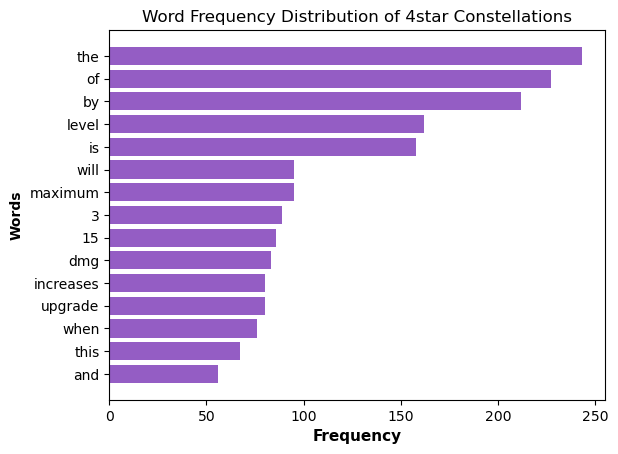

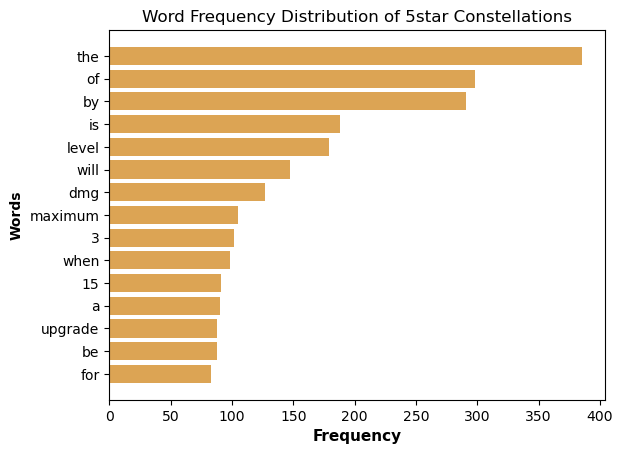

In [56]:
get_histogram_simple(df1_Epic)
get_histogram_simple(df1_Legendary)